## Analyzing inference error for 5LayerModel

In [1]:
%reload_ext autoreload
%autoreload 2
# General modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import BayesianModelSampling

# Import RCA module
import RCAmodule as rca

### Define 5LayerModel

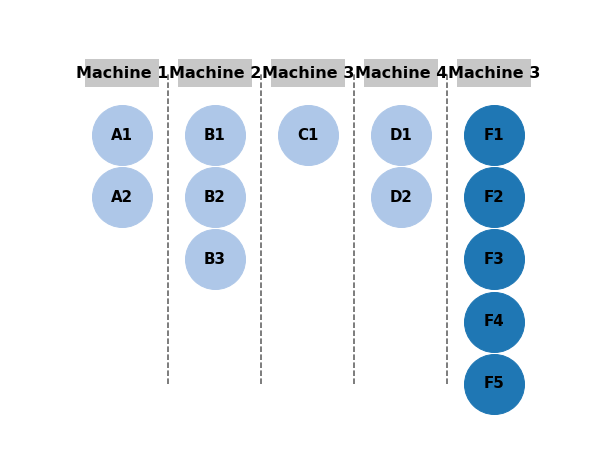

In [2]:
# With measurement nodes
process1 = [{'Name': 'Machine 1', 
            'Nodes': [('A1', 'cause', 'binary'), 
                      ('A2', 'cause', 'binary'),
                      ('M1', 'measurement', 'binary')]},
           
           {'Name': 'Machine 2', 
            'Nodes': [('B1', 'cause', 'binary'),
                      ('B2', 'cause', 'binary'),
                      ('B3', 'cause', 'binary'),
                      ('M2', 'measurement', 'binary'),
                      ('M3', 'measurement', 'binary')]},
         
           {'Name': 'Machine 3', 
            'Nodes': [('C1', 'cause', 'binary')]},
           
           {'Name': 'Machine 4', 
            'Nodes': [('D1', 'cause', 'binary'),
                      ('D2', 'cause', 'binary'),
                      ('M4', 'measurement', 'binary')]},
           
           
           {'Name': 'Machine 3', 
            'Nodes': [('F1', 'fault', 'binary'), 
                      ('F2', 'fault', 'binary'), 
                      ('F3', 'fault', 'binary'),
                      ('F4', 'fault', 'binary'), 
                      ('F5', 'fault', 'binary')]}
           ]

# Without measurement nodes
process2 = [{'Name': 'Machine 1', 
            'Nodes': [('A1', 'cause', 'binary'), 
                      ('A2', 'cause', 'binary')]},
           
           {'Name': 'Machine 2', 
            'Nodes': [('B1', 'cause', 'binary'),
                      ('B2', 'cause', 'binary'),
                      ('B3', 'cause', 'binary')]},
         
           {'Name': 'Machine 3', 
            'Nodes': [('C1', 'cause', 'binary')]},
           
           {'Name': 'Machine 4', 
            'Nodes': [('D1', 'cause', 'binary'),
                      ('D2', 'cause', 'binary')]},
           
           
           {'Name': 'Machine 3', 
            'Nodes': [('F1', 'fault', 'binary'), 
                      ('F2', 'fault', 'binary'), 
                      ('F3', 'fault', 'binary'),
                      ('F4', 'fault', 'binary'), 
                      ('F5', 'fault', 'binary')]}
         ]
            
# Create RCAmocel
P = rca.RCAModel(process1)
P_n =rca.RCAModel(process2)
# Plot problem
#P.plotProcess(figname='rca_network_small.png')
P_n.plotProcess()

#### Load data

In [3]:
data              =  pickle.load(open("samples_5LayerModel.pkl", "rb"))
data_without_M = data.drop(['M1','M2','M3','M4'], axis=1)
print(data_without_M)

        A1  D1  B3  F1  A2  B1  C1  F4  B2  D2  F3  F5  F2
0        0   0   0   0   0   0   1   0   0   0   0   0   0
1        0   0   0   0   0   0   1   0   0   0   0   0   0
2        0   0   0   0   0   0   0   0   0   1   1   0   0
3        0   0   0   0   0   0   0   0   0   0   0   0   0
4        0   0   0   0   0   0   0   0   0   0   0   0   0
5        0   0   0   0   0   0   0   0   0   0   0   0   0
6        0   0   0   0   0   0   0   0   0   0   0   0   0
7        0   0   0   0   0   0   0   0   0   0   0   0   0
8        0   0   0   0   0   0   0   0   0   0   0   0   0
9        1   0   1   1   0   0   1   0   0   0   1   0   0
10       0   0   0   0   0   0   1   0   0   1   1   0   0
11       0   0   0   0   0   0   0   0   0   0   0   0   0
12       0   0   0   0   0   0   1   0   0   0   0   0   0
13       0   0   0   0   0   0   1   0   0   1   1   0   0
14       0   0   0   0   0   0   1   0   0   0   0   0   0
15       0   0   0   0   0   0   1   0   0   0   0   0  

## Error estimates!

# Create model w exact values to compute inference error

In [4]:
mod = BayesianModel([('A1', 'F1'),
                     ('A2', 'B1'),
                     ('A2', 'F5'),
                     ('B1', 'C1'),
                     ('B1', 'F4'),
                     ('B2', 'D2'),
                     ('B3', 'F5'),
                     ('B3', 'F3'),
                     ('C1', 'F2'),
                     ('D1', 'F1'),
                     ('D2', 'F2'),
                     ('D2', 'F3'),
                     ('A1', 'M1'),
                     ('B1', 'M2'),
                     ('B2', 'M3'),
                     ('D1', 'M4')
                     ])

#### LAYER 1

# Create conditional probability distribution
cpd_A1 = TabularCPD(variable='A1', variable_card=2, values=[[0.91, 0.09]])

# Create conditional probability distribution
cpd_A2 = TabularCPD(variable='A2', variable_card=2, values=[[0.86, 0.14]])

# Create conditional probability distribution 
cpd_M1 = TabularCPD(variable='M1', 
                    variable_card=2, 
                    values=[[0.97, 0.3],
                            [0.03, 0.7]],
                    evidence = ['A1'],
                    evidence_card = [2])



#### LAYER 2

# Create conditional probability distribution
cpd_B1 = TabularCPD(variable='B1', 
                    variable_card=2, 
                    values=[[0.98, 0.4],
                            [0.02, 0.6]],
                    evidence = ['A2'],
                    evidence_card = [2])

# Create conditional probability distribution
cpd_B2 = TabularCPD(variable='B2', variable_card=2, values=[[0.96, 0.04]])

# Create conditional probability distribution
cpd_B3 = TabularCPD(variable='B3', variable_card=2, values=[[0.94, 0.06]])

# Create conditional probability distribution 
cpd_M2 = TabularCPD(variable='M2', 
                    variable_card=2, 
                    values=[[0.80, 0.65],
                            [0.20, 0.35]],
                    evidence = ['B1'],
                    evidence_card = [2])


# Create conditional probability distribution 
cpd_M3 = TabularCPD(variable='M3', 
                    variable_card=2, 
                    values=[[0.40, 0.15],
                            [0.60, 0.85]],
                    evidence = ['B2'],
                    evidence_card = [2])



#### LAYER 3

# Create conditional probability distribution 
cpd_C1 = TabularCPD(variable='C1', 
                    variable_card=2, 
                    values=[[0.80, 0.65],
                            [0.20, 0.35]],
                    evidence = ['B1'],
                    evidence_card = [2])



#### LAYER 4


# Create conditional probability distribution
cpd_D1 = TabularCPD(variable='D1', variable_card=2, values=[[0.87, 0.13]])

# Create conditional probability distribution 
cpd_D2 = TabularCPD(variable='D2', 
                    variable_card=2, 
                    values=[[0.80, 0.95],
                            [0.20, 0.05]],
                    evidence = ['B2'],
                    evidence_card = [2])


# Create conditional probability distribution 
cpd_M4 = TabularCPD(variable='M4', 
                    variable_card=2, 
                    values=[[0.99, 0.40],
                            [0.01, 0.60]],
                    evidence = ['D1'],
                    evidence_card = [2])






#### LAYER 5

cpd_F1 = TabularCPD(variable='F1', 
                    variable_card=2, 
                    values=[[0.995, 0.40, 0.70, 0.22],
                            [0.005, 0.60, 0.30, 0.78]],
                    evidence = ['A1', 'D1'],
                    evidence_card = [2, 2])


cpd_F2 = TabularCPD(variable='F2', 
                    variable_card=2, 
                    values=[[0.97, 0.86, 0.80, 0.77],
                            [0.03, 0.14, 0.20, 0.23]],
                    evidence = ['C1', 'D2'],
                    evidence_card = [2, 2])


cpd_F3 = TabularCPD(variable='F3', 
                    variable_card=2, 
                    values=[[1.0, 0.08, 0.40, 0.03],
                            [0.0, 0.92, 0.60, 0.97]],
                    evidence = ['B3', 'D2'],
                    evidence_card = [2, 2])


cpd_F4 = TabularCPD(variable='F4', 
                    variable_card=2, 
                    values=[[0.97, 0.85],
                            [0.03, 0.15]],
                    evidence = ['B1'],
                    evidence_card = [2])


cpd_F5 = TabularCPD(variable='F5', 
                    variable_card=2, 
                    values=[[0.92, 0.87, 0.90, 0.81],
                            [0.08, 0.13, 0.10, 0.19]],
                    evidence = ['A2', 'B3'],
                    evidence_card = [2, 2])

# Add cpds to model
mod.add_cpds(cpd_A1, cpd_A2, cpd_B1, cpd_B2, cpd_B3, cpd_C1, cpd_D1, cpd_D2, cpd_F1, cpd_F2, cpd_F3, cpd_F4, cpd_F5, cpd_M1, cpd_M2, cpd_M3, cpd_M4)


In [ ]:
#def computeTrainingError(model_trained, method = 'values', model_true = None, data_true = None):
#    # Use some kind of mean sqaure error
#    if method is 'values':
#        if model_true:
#            # create lists
#            trained_model_cpds = cpdsToList(model_trained.cpds)
#            true_model_cpds    = cpdsToList(model_true.cpds)
#            avg_difference = np.sum([np.abs(val1-val2) for val1,val2 in zip(trained_model_cpds, true_model_cpds)])
#            training_error = avg_difference/len(trained_model_cpds)
#        else:
#            pass
#    else:
#        pass
    
#    return training_error

In [5]:
from pgmpy.inference import VariableElimination


def computeInferenceError(model_trained, model_true, infer_type, nodes, evidence_true, evidence_trained, method):
    # Inference trained model
    #inferred_trained = P.inference(method, nodes, evidence)
    # Inference true model
    if method is 'varelim':
        model_true_infer       =  VariableElimination(model_true)
        model_trained_infer    =  VariableElimination(model_trained)
        if infer_type is 'conditional':
            # Conditional distribution query
            inferred_true           =  model_true_infer.query(nodes, evidence_true)
            inferred_trained        =  model_trained_infer.query(nodes, evidence_trained)
            # MOVED THIS PART INSIDE 'if'
            inferred_true_flat    = inferenceFlatten(inferred_true, nodes) # Make list
            inferred_trained_flat = inferenceFlatten(inferred_trained, nodes)
 
        else: # map_query
            inferred_true           =  model_true_infer.map_query(nodes, evidence_true) # most proabable assignment, new!
            inferred_trained        =  model_trained_infer.map_query(nodes, evidence_trained)
            inferred_true_flat = [inferred_true[node] for node in nodes]
            inferred_trained_flat = [inferred_true[node] for node in nodes]
        #l2 norm
        inferenceError = np.sqrt(np.sum(np.abs(np.subtract(inferred_true_flat, inferred_trained_flat))**2))
        return inferenceError
    else:
        pass

## Flatten cpds

In [6]:
#plt.plot(sampleSizes,inferenceError);
#print(P.model.cpds)
def cpdsToList(model_cpds):
# "flatten" cpds
    cpds_in_list = []
    for cpd in model_cpds:
        for val in cpd.values:
            if type(val)==np.ndarray:
                if type(val[0])==np.float64:
                    for vals in val:
                        cpds_in_list.append(vals)
                else:
                    for vals in val[0]:
                        cpds_in_list.append(vals)
            else:
                cpds_in_list.append(val)
    return cpds_in_list

# Inference error

## Nbr of corret edges found 

In [ ]:
numIterations   = 50  # Start with few
numIncrements = 100
# Increments
sampleDifference = 3000 


testSet        =  data.sample(10000) # Sample from dataframe
remaingData_indices = [ind for ind in data.index if not ind in testSet.index ]
remainingData   =  pd.DataFrame(data.values[remaingData_indices], columns = data.columns)

# Save number of correct edges
numberOfCorrectEdges = np.zeros([numIterations, numIncrements])
sampleSizes          = [(i + 1) * sampleDifference for i in range(numIncrements)]

for i in range(numIterations):
    for j in range(numIncrements):
        # New model each time
        P = rca.RCAModel(process1)
        # Number of samples
        numSamples = (j + 1) * sampleDifference 
        # Sample size increments
        #sampleSizes[i] = numSamples
        # Sample from dataframe without testSet
        trainingSet = remainingData.sample(numSamples)
        # Structure learning, constraintbased
        P.structureLearning(trainingSet,'constraintbased',[])
        # Check number of edges, we count reverse edges as well! See code in RCAmodule.
        nbrEdges = [i+1 for i, edge in zip(range(len(P.model.edges())),P.model.edges()) if (edge[0], edge[1]) in mod.edges() or (edge[1], edge[0]) in mod.edges()]                                               #len(P.model.edges())
        numberOfCorrectEdges[i][j] = nbrEdges[len(nbrEdges)-1]

In [ ]:
nbrEdges = [i+1 for i, edge in zip(range(len(P.model.edges())),P.model.edges()) if (edge[0], edge[1]) in mod.edges() or (edge[1], edge[0]) in mod.edges()]

## Latest tasks

In [7]:
def inferenceFlatten(inferred, nodes):
    #inferred_trained = P.inference(method,nodes,evidence)
    cpds_in_list     = []
    for node in nodes:
        if type(inferred[node].values[0])==np.float64:
            for val in inferred[node].values:
                cpds_in_list.append(val)
        elif type(inferred[node].values[0])== np.ndarray:
            for arr in inferred[node].values:
                for val in arr:
                    cpds_in_list.append(val)
    return cpds_in_list

## Structure and parameter learning all M and F

In [ ]:
from numpy.random import randint
import time
tic = time.clock()

numIterations    = 100  
numCombinations  = 50

sampleDifference = 3000 

testSet        =  data.sample(10000) # Sample from dataframe
remaingData_indices = [ind for ind in data.index if not ind in testSet.index ]
remainigData   =  pd.DataFrame(data.values[remaingData_indices], columns = data.columns)
inferenceError0 =  np.zeros([numCombinations, numIterations]) # Initialize
sampleSizes    =  np.zeros(numIterations)
edgesFound0     = []

inferencecmd = {'Method': 'varelim',
            'Nodes': ['A1', 
                       'A2', 
                       'B1',
                       'B2',
                       'B3',
                       'C1',
                       'D1',
                       'D2']
         
               }  

evidence_nodes_true = ['F1', 'F2', 'F3', 'F4', 'F5','M1', 'M2', 'M3', 'M4' ]
evidence_nodes_trained = evidence_nodes_true

for j in range(numCombinations):
    # Each combination of evidence
    combinations = randint(0,2,9) # Random sample
    inferencecmd['Evidence true'] ={}
    inferencecmd['Evidence trained'] ={}
    for node, val in zip(evidence_nodes_true, combinations):
        inferencecmd['Evidence true'][node]=val
    for node, val in zip(evidence_nodes_trained, combinations):
        inferencecmd['Evidence trained'][node]=val

    for i in range(numIterations):
        # In each iteration, create a new model. 
        P0 = rca.RCAModel(process1)
        # Number of samples
        numSamples = (i + 1) * sampleDifference 
        sampleSizes[i] = numSamples
        # Sample from dataframe without testSet
        trainingSet = remainigData.sample(numSamples)
        P0.structureLearning(trainingSet, 'constraintbased',[]) 
        edgesFound0.append(P0.model.edges())
        # Parameter learning
        P0.parameterLearning(trainingSet, method='Bayes')

        # Inference error. How? Take cpds from model definition and compare.
        inferenceError0[j][i]= computeInferenceError(P0.model, mod,'conditional',inferencecmd['Nodes'], inferencecmd['Evidence true'],inferencecmd['Evidence trained'], inferencecmd['Method'])

    
toc = time.clock()
toc - tic

In [ ]:
np.savetxt('inferenceError_large_struc_param_FM_new_P0.txt', inferenceError0, fmt='%10.5f')
np.savetxt('edges_found_P0_large.txt',edgesFound0, fmt='%s')

## Structure + parameter + inference given only F

In [40]:
tic = time.clock()

numIterations    = 100  # Start with few
numCombinations  = 50
sampleDifference = 2000 

testSet             =  data_without_M.sample(10000) # Sample from dataframe
remaingData_indices = [ind for ind in data_without_M.index if not ind in testSet.index ]
remaingData         =  pd.DataFrame(data_without_M.values[remaingData_indices], columns = data_without_M.columns)
inferenceError1     =  np.zeros([numCombinations, numIterations]) # Initialize
sampleSizes         =  np.zeros(numIterations)
edgesFound1         = []

inferencecmd = {'Method': 'varelim',
            'Nodes': ['A1', 
                       'A2', 
                       'B1',
                       'B2',
                       'B3',
                       'C1',
                       'D1',
                       'D2']
         
               }  

     
evidence_nodes_trained = ['F1', 'F2', 'F3', 'F4', 'F5']
evidence_nodes_true = ['F1', 'F2', 'F3', 'F4', 'F5','M1', 'M2', 'M3', 'M4']


for j in range(numCombinations):
    # Each combination of evidence
    combinations = randint(0,2,9) # Random sample
    inferencecmd['Evidence true'] ={}
    inferencecmd['Evidence trained'] ={}
    for node, val in zip(evidence_nodes_true, combinations):
        inferencecmd['Evidence true'][node]=val
    for node, val in zip(evidence_nodes_trained, combinations):
        inferencecmd['Evidence trained'][node]=val
        
    for i in range(numIterations):
        # In each iteration, create a new model. 
        P1 = rca.RCAModel(process2)

        # Number of samples
        numSamples = (i + 1) * sampleDifference 
        sampleSizes[i] = numSamples
        # Sample from dataframe without testSet
        trainingSet = remaingData.sample(numSamples)
        P1.structureLearning(trainingSet, 'constraintbased', []) 
        edgesFound1.append(P1.model.edges())
        # Parameter learning
        P1.parameterLearning(trainingSet, method='Bayes')

        # Inference error. How? Take cpds from model definition and compare.
        inferenceError1[j][i] = computeInferenceError(P1.model, mod,'conditional',inferencecmd['Nodes'], inferencecmd['Evidence true'],inferencecmd['Evidence trained'], inferencecmd['Method'])
toc = time.clock()
toc - tic

13836.003112619976

In [46]:
np.savetxt('inferenceError_large_struc_param_F_new_P1_new_2.txt', inferenceError1, fmt='%10.5f')
np.savetxt('edges_found_P1_large.txt',edgesFound1, fmt='%s')

## Parameter and inference all M and F (model given)

In [ ]:
numIterations    = 100  
numCombinations  = 50

sampleDifference = 3000 

testSet        =  data.sample(10000) # Sample from dataframe
remaingData_indices = [ind for ind in data.index if not ind in testSet.index ]
remainigData   =  pd.DataFrame(data.values[remaingData_indices], columns = data.columns)
inferenceError2 =  np.zeros([numCombinations, numIterations]) # Initialize
sampleSizes    =  np.zeros(numIterations)

inferencecmd = {'Method': 'varelim',
            'Nodes': ['A1', 
                       'A2', 
                       'B1',
                       'B2',
                       'B3',
                       'C1',
                       'D1',
                       'D2']
         
               }  

evidence_nodes_true = ['F1', 'F2', 'F3', 'F4', 'F5','M1', 'M2', 'M3', 'M4' ]
evidence_nodes_trained = evidence_nodes_true

for j in range(numCombinations):
    # Each combination of evidence
    combinations = randint(0,2,9) # Random sample
    inferencecmd['Evidence true'] ={}
    inferencecmd['Evidence trained'] ={}
    for node, val in zip(evidence_nodes_true, combinations):
        inferencecmd['Evidence true'][node]=val
    for node, val in zip(evidence_nodes_trained, combinations):
        inferencecmd['Evidence trained'][node]=val

    for i in range(numIterations):
        # In each iteration, create a new model. 
        P2 = rca.RCAModel(process1)
        # Number of samples
        
        for edge in mod.edges():
            P2.model.add_edge(edge[0],edge[1])
            
        numSamples = (i + 1) * sampleDifference 
        sampleSizes[i] = numSamples
        # Sample from dataframe without testSet
        trainingSet = remainigData.sample(numSamples) 
        # Parameter learning
        P2.parameterLearning(trainingSet, method='Bayes')

        # Inference error. How? Take cpds from model definition and compare.
        inferenceError2[j][i] = computeInferenceError(P2.model, mod,'conditional', inferencecmd['Nodes'], inferencecmd['Evidence true'],inferencecmd['Evidence trained'], inferencecmd['Method'])
       

In [ ]:
np.savetxt('inferenceError_large_model_given_FM_new_P2.txt', inferenceError2, fmt='%10.5f')

## Parameter learning and inference given F

In [41]:
import time
tic = time.clock()

numIterations    = 100  # Start with few

numCombinations = 50

sampleDifference = 2000 

testSet             =  data_without_M.sample(10000) # Sample from dataframe
remaingData_indices = [ind for ind in data_without_M.index if not ind in testSet.index ]
remaingData         =  pd.DataFrame(data_without_M.values[remaingData_indices], columns = data_without_M.columns)
inferenceError3     =  np.zeros([numCombinations, numIterations]) # Initialize
sampleSizes         =  np.zeros(numIterations)

inferencecmd = {'Method': 'varelim',
            'Nodes': ['A1', 
                       'A2', 
                       'B1',
                       'B2',
                       'B3',
                       'C1',
                       'D1',
                       'D2']
         
               }  

evidence_nodes_true = ['F1', 'F2', 'F3', 'F4', 'F5','M1', 'M2', 'M3', 'M4' ]
evidence_nodes_trained = ['F1', 'F2', 'F3', 'F4', 'F5']

edges = set(mod.edges())-{('A1', 'M1'),('B1', 'M2'),('B2', 'M3'),('D1', 'M4')}

for j in range(numCombinations):
    # Each combination of evidence
    combinations = randint(0,2,9) # Random sample
    inferencecmd['Evidence true'] ={}
    inferencecmd['Evidence trained'] ={}
    for node, val in zip(evidence_nodes_true, combinations):
        inferencecmd['Evidence true'][node]=val
    for node, val in zip(evidence_nodes_trained, combinations):
        inferencecmd['Evidence trained'][node]=val

    for i in range(numIterations):
        # In each iteration, create a new model. 
        P3 = rca.RCAModel(process2)
        #
        for edge in edges:
            P3.model.add_edge(edge[0],edge[1])
        # Number of samples
        numSamples = (i + 1) * sampleDifference 
        sampleSizes[i] = numSamples
        # Sample from dataframe without testSet
        trainingSet = remaingData.sample(numSamples)
        # Parameter learning
        P3.parameterLearning(trainingSet, method='Bayes')

        # Inference error. How? Take cpds from model definition and compare.
        inferenceError3[j][i] = computeInferenceError(P3.model, mod,'conditional', inferencecmd['Nodes'],inferencecmd['Evidence true'],inferencecmd['Evidence trained'], inferencecmd['Method'])
    #inferenceError = computeInferenceError(P.model,mod,inferencecmd['Nodes'], inferencecmd['Evidence'], inferencecmd['Method'])
    
toc = time.clock()
toc - tic

1312.1648628306284

In [45]:
np.savetxt('inferenceError_large_model_given_F_new_P3_new_2.txt', inferenceError3, fmt='%10.5f')

In [32]:
edges = set(mod.edges())-{('A1', 'M1'),('B1', 'M2'),('B2', 'M3'),('D1', 'M4')}

[('A1', 'F1'), ('A2', 'B1'), ('A2', 'F5'), ('B1', 'F4'), ('B1', 'C1'), ('B2', 'D2'), ('B3', 'F3'), ('B3', 'F5'), ('C1', 'F2'), ('D1', 'F1'), ('D2', 'F2'), ('D2', 'F3')]
[('A1', 'F1'), ('A1', 'M1'), ('A2', 'B1'), ('A2', 'F5'), ('B1', 'C1'), ('B1', 'F4'), ('B1', 'M2'), ('C1', 'F2'), ('B2', 'D2'), ('B2', 'M3'), ('D2', 'F2'), ('D2', 'F3'), ('B3', 'F5'), ('B3', 'F3'), ('D1', 'F1'), ('D1', 'M4')]


## Structure learning and parameter learning given expert edges, F and M

In [ ]:
import time
tic = time.clock()

numIterations    = 100  # Start with few

numCombinations = 50

sampleDifference = 3000 

testSet        =  data.sample(10000) # Sample from dataframe
remaingData_indices = [ind for ind in data.index if not ind in testSet.index ]
remaingData   =  pd.DataFrame(data.values[remaingData_indices], columns = data.columns)
inferenceError4 =  np.zeros([numCombinations, numIterations]) # Initialize
sampleSizes    =  np.zeros(numIterations)
edgesFound4 = []

inferencecmd = {'Method': 'varelim',
            'Nodes': ['A1', 
                       'A2', 
                       'B1',
                       'B2',
                       'B3',
                       'C1',
                       'D1',
                       'D2']
         
               }  

evidence_nodes_true = ['F1', 'F2', 'F3', 'F4', 'F5','M1', 'M2', 'M3', 'M4' ]
evidence_nodes_trained = ['F1', 'F2', 'F3', 'F4', 'F5']

expert_edges = [('A1', 'F1'),('A2', 'B1'),('B1', 'C1'),('B2', 'D2'),('D2', 'F3')]

for j in range(numCombinations):
    # Each combination of evidence
    combinations = randint(0,2,9) # Random sample
    inferencecmd['Evidence true'] ={}
    inferencecmd['Evidence trained'] ={}
    for node, val in zip(evidence_nodes_true, combinations):
        inferencecmd['Evidence true'][node]=val
    for node, val in zip(evidence_nodes_trained, combinations):
        inferencecmd['Evidence trained'][node]=val

    for i in range(numIterations):
        # In each iteration, create a new model. 
        P4 = rca.RCAModel(process1)

        # Number of samples
        numSamples = (i + 1) * sampleDifference 
        sampleSizes[i] = numSamples
        # Sample from dataframe without testSet
        trainingSet = remaingData.sample(numSamples)
        P4.structureLearning(trainingSet, 'constraintbased', expert_edges) 
        edgesFound4.append(P4.model.edges())
        # Parameter learning
        P4.parameterLearning(trainingSet, method='Bayes')

        # Inference error. How? Take cpds from model definition and compare.
        inferenceError4[j][i] = computeInferenceError(P4.model, mod,'conditional', inferencecmd['Nodes'], inferencecmd['Evidence true'],inferencecmd['Evidence trained'] ,inferencecmd['Method'])
    #inferenceError = computeInferenceError(P.model,mod,inferencecmd['Nodes'], inferencecmd['Evidence'], inferencecmd['Method'])
    
toc = time.clock()
toc - tic

In [ ]:
np.savetxt('inferenceError_large_expert_given_FM_new_P4.txt', inferenceError4, fmt='%10.5f')
np.savetxt('edges_found_P4_large.txt',edgesFound4, fmt='%s')

## Structure learning with expert edges inference given F

In [43]:
import time
tic = time.clock()

numIterations    = 100  # Start with few

numCombinations = 50

sampleDifference = 2000 

testSet             =  data_without_M.sample(10000) # Sample from dataframe
remaingData_indices = [ind for ind in data_without_M.index if not ind in testSet.index ]
remaingData         =  pd.DataFrame(data_without_M.values[remaingData_indices], columns = data_without_M.columns)
inferenceError5     =  np.zeros([numCombinations, numIterations]) # Initialize
sampleSizes         =  np.zeros(numIterations)

edgesFound5    = []
inferencecmd = {'Method': 'varelim',
            'Nodes': ['A1', 
                       'A2', 
                       'B1',
                       'B2',
                       'B3',
                       'C1',
                       'D1',
                       'D2']
         
               }  

evidence_nodes_true = ['F1', 'F2', 'F3', 'F4', 'F5','M1', 'M2', 'M3', 'M4' ]
evidence_nodes_trained = ['F1', 'F2', 'F3', 'F4', 'F5']

expert_edges = [('A1', 'F1'),('A2', 'B1'),('B1', 'C1'),('B2', 'D2'),('D2', 'F3'),('B3', 'F5')]

for j in range(numCombinations):
    # Each combination of evidence
    combinations = randint(0,2,9) # Random sample
    inferencecmd['Evidence true'] ={}
    inferencecmd['Evidence trained'] ={}
    for node, val in zip(evidence_nodes_true, combinations):
        inferencecmd['Evidence true'][node]=val
    for node, val in zip(evidence_nodes_trained, combinations):
        inferencecmd['Evidence trained'][node]=val

    for i in range(numIterations):
        # In each iteration, create a new model. 
        P5 = rca.RCAModel(process2)

        # Number of samples
        numSamples = (i + 1) * sampleDifference 
        sampleSizes[i] = numSamples
        # Sample from dataframe without testSet
        trainingSet = remaingData.sample(numSamples)
        P5.structureLearning(trainingSet, 'constraintbased', expert_edges) 
        edgesFound5.append(P5.model.edges())
        # Parameter learning
        P5.parameterLearning(trainingSet, method='Bayes')

        # Inference error. How? Take cpds from model definition and compare.
        inferenceError5[j][i] = computeInferenceError(P5.model, mod,'conditional', inferencecmd['Nodes'],inferencecmd['Evidence true'],inferencecmd['Evidence trained'], inferencecmd['Method'])
    #inferenceError = computeInferenceError(P.model,mod,inferencecmd['Nodes'], inferencecmd['Evidence'], inferencecmd['Method'])
    
toc = time.clock()
toc - tic

13821.175442366046

In [44]:
np.savetxt('inferenceError_large_expert_given_F_new_P5_new_2.txt', inferenceError5, fmt='%10.5f')
np.savetxt('edges_found_P5_large.txt',edgesFound5, fmt='%s')

In [ ]:
expert_edges = [('A1', 'F1'),('A2', 'B1'),('B1', 'C1'),('B2', 'D2'),('D2', 'F3'),('B3', 'F5')]